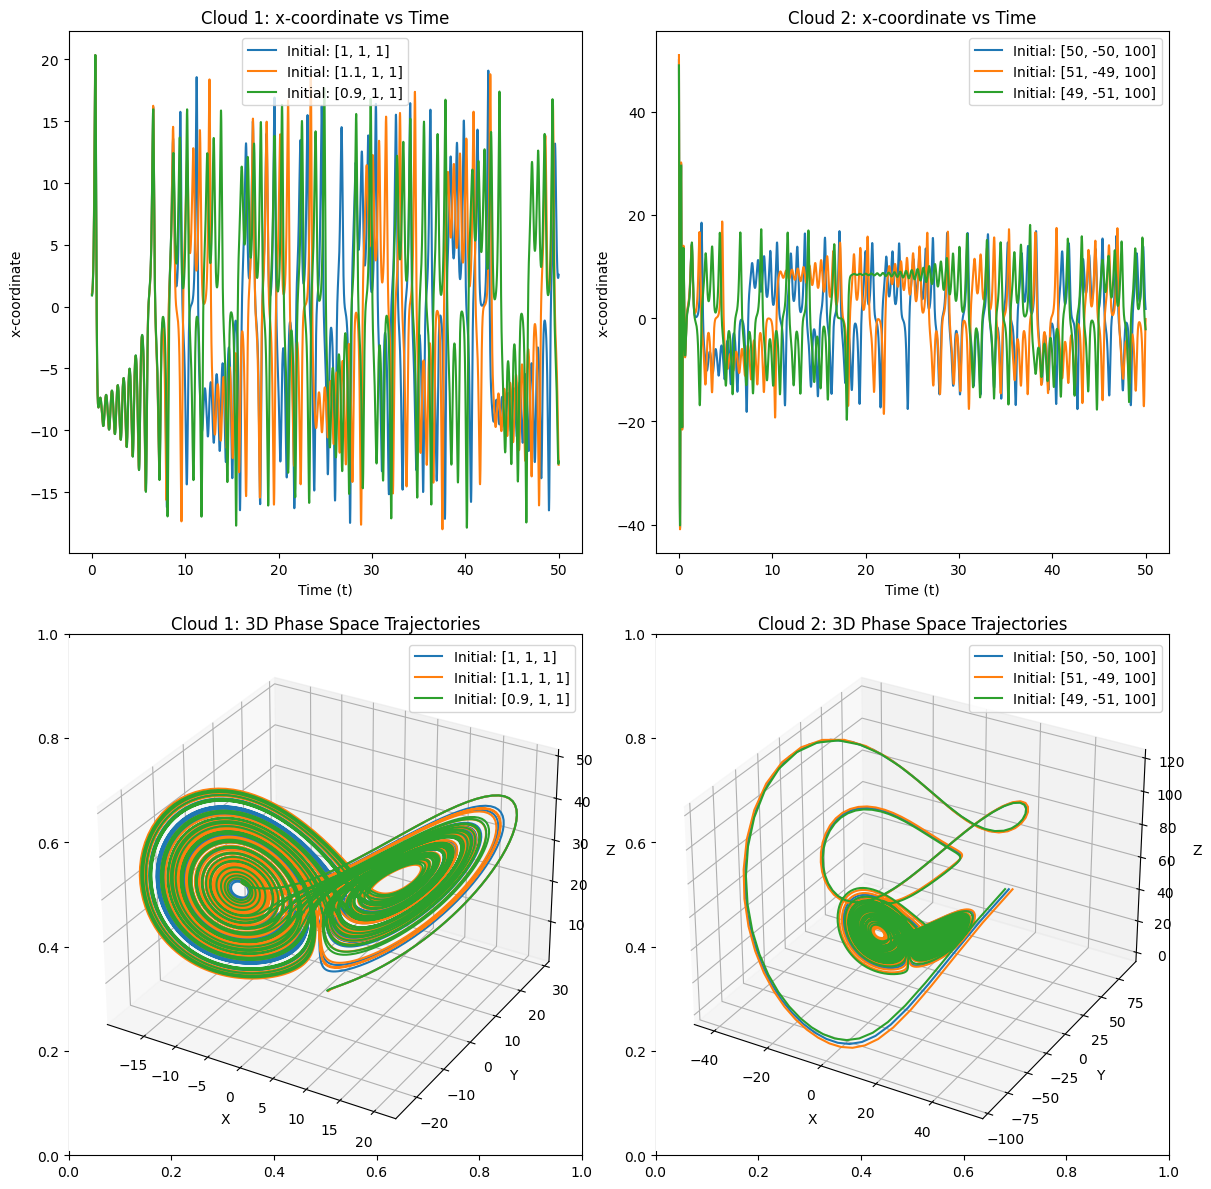

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sigma = 10
beta = 8 / 3
rho = 28
t_0 = 0
t_f = 50
n = 10000
delta = (t_f - t_0) / n

def lorenz_system(t, state, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def euler_method_lorenz(mu_conditions):
    t = [t_0]
    states = [mu_conditions]
    for _ in range(n):
        dx, dy, dz = lorenz_system(t[-1], states[-1], sigma, beta, rho)
        new_state = [states[-1][0] + delta * dx, 
                     states[-1][1] + delta * dy, 
                     states[-1][2] + delta * dz]
        states.append(new_state)
        t.append(t[-1] + delta)
    return t, states

cloud_1 = [
    [1, 1, 1],
    [1.1, 1, 1],
    [0.9, 1, 1],
]

cloud_2 = [
    [50, -50, 100],
    [51, -49, 100],
    [49, -51, 100]
]

fig, axs = plt.subplots(2, 2, figsize = (12, 12))

# cloud 1 x-value over time
for initial_condition in cloud_1:
    t, states = euler_method_lorenz(initial_condition)
    x = [state[0] for state in states]
    axs[0, 0].plot(t, x, label = f'Initial: {initial_condition}')
axs[0, 0].set_xlabel('Time (t)')
axs[0, 0].set_ylabel('x-coordinate')
axs[0, 0].set_title('Cloud 1: x-coordinate vs Time')
axs[0, 0].legend()

# cloud 2 x-value over time
for initial_condition in cloud_2:
    t, states = euler_method_lorenz(initial_condition)
    x = [state[0] for state in states]
    axs[0, 1].plot(t, x, label = f'Initial: {initial_condition}')
axs[0, 1].set_xlabel('Time (t)')
axs[0, 1].set_ylabel('x-coordinate')
axs[0, 1].set_title('Cloud 2: x-coordinate vs Time')
axs[0, 1].legend()

# cloud 1 3d phase space trajectory
ax_3d_1 = fig.add_subplot(2, 2, 3, projection = '3d')
for initial_condition in cloud_1:
    t, states = euler_method_lorenz(initial_condition)
    x = [state[0] for state in states]
    y = [state[1] for state in states]
    z = [state[2] for state in states]
    ax_3d_1.plot(x, y, z, label = f'Initial: {initial_condition}')
ax_3d_1.set_xlabel('X')
ax_3d_1.set_ylabel('Y')
ax_3d_1.set_zlabel('Z')
ax_3d_1.set_title('Cloud 1: 3D Phase Space Trajectories')
ax_3d_1.legend()

# cloud 2 3d phase space trajectory
ax_3d_2 = fig.add_subplot(2, 2, 4, projection = '3d')
for initial_condition in cloud_2:
    t, states = euler_method_lorenz(initial_condition)
    x = [state[0] for state in states]
    y = [state[1] for state in states]
    z = [state[2] for state in states]
    ax_3d_2.plot(x, y, z, label = f'Initial: {initial_condition}')
ax_3d_2.set_xlabel('X')
ax_3d_2.set_ylabel('Y')
ax_3d_2.set_zlabel('Z')
ax_3d_2.set_title('Cloud 2: 3D Phase Space Trajectories')
ax_3d_2.legend()

plt.tight_layout()
plt.show()